# 第II部
# 第11章 統計解析で分かること・分からないこと

In [1]:
sapply(c("pipeR", "dplyr", "tidyr", "ggplot2", "readr", "readxl", "Cairo", "grid", "gridExtra"), 
       require, character.only = TRUE)

Loading required package: pipeR
Loading required package: dplyr
Warning message:
: package 'dplyr' was built under R version 3.3.1
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: tidyr
Loading required package: ggplot2
Loading required package: readr
Loading required package: readxl
Loading required package: Cairo
Loading required package: grid
Loading required package: gridExtra
Warning message:
: package 'gridExtra' was built under R version 3.3.1
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



pipeR     dplyr     tidyr   ggplot2     readr    readxl     Cairo      grid 
     TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE 
gridExtra 
     TRUE

* x: 子供のゲーム時間
* y: 親の認識したゲーム時間

In [2]:
d <- read_csv("chap11_1.csv", locale = locale(encoding = "cp932"))
d

,親子,x,y
1,1,290,350
2,2,50,70
3,3,80,100
4,4,100,130
5,5,200,250
6,6,350,430
7,7,430,520
8,8,80,100
9,9,210,260
10,10,110,140


（1.1）x, y それぞれについて度数分布，代表値，散布度

In [3]:
options(repr.plot.width = 8, repr.plot.height = 6)

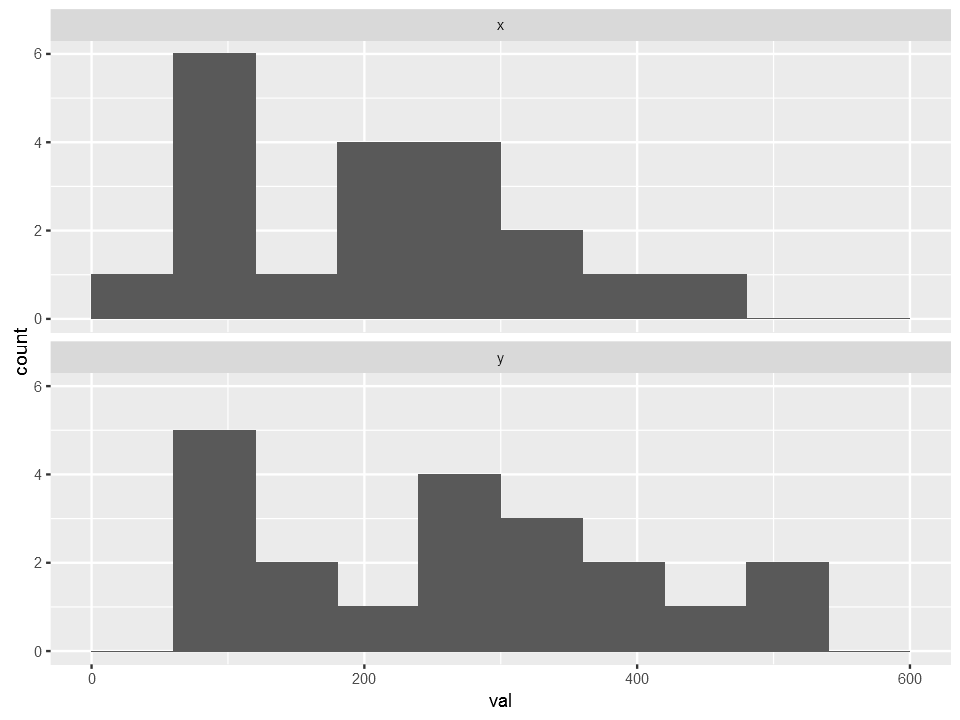

In [4]:
d %>>% gather(key, val, -親子) %>>% 
    ggplot(aes(x = val)) + geom_histogram(breaks = seq(0, 600, 60)) + facet_wrap(~ key, nrow = 2)

* 平均値

In [5]:
d %>>% summarise_each(funs(mean), -親子)

,x,y
1,213.5,262.5


* 中央値

In [6]:
d %>>% summarise_each(funs(median), -親子)

,x,y
1,215,265


* 標本分散

In [7]:
varp <- function(x) {
    ret <- var(x) * (length(x) - 1) / length(x)
    ret
}

In [8]:
d %>>% summarise_each(funs(varp), -親子)

,x,y
1,13492.75,19328.75


* 標準偏差

In [9]:
d %>>% summarise_each(funs(sqrt(varp(.))), -親子)

,x,y
1,116.1583,139.0279


（1.2）xとyの差について，度数分布，代表値，散布度

In [10]:
d <- d %>>% mutate(yx = y - x)

In [11]:
options(repr.plot.width = 4, repr.plot.height = 4)

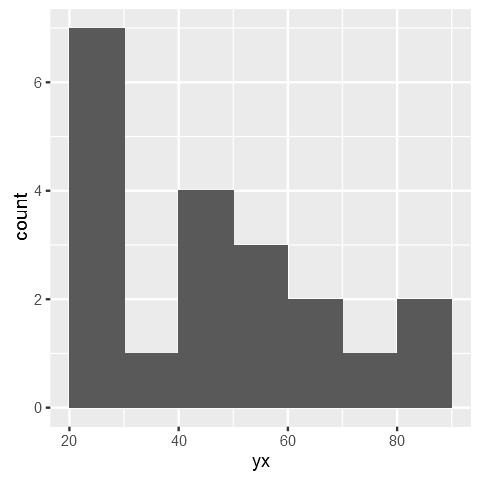

In [12]:
d %>>% ggplot(aes(x = yx)) + geom_histogram(breaks = seq(20, 90, 10))

In [13]:
d %>>% summarise_each(funs(mean, median, varp, sqrt(varp(.))), yx)

,mean,median,varp,sqrt
1,49,50,529,23


（1.3）xとyの相関係数

In [14]:
with(cor(x, y), data = d)

[1] 0.9998148

（1.4）`y~x`の回帰式

In [15]:
res.lm <- lm(y~x, data = d)
res.lm %>>% summary()


Call:
lm(formula = y ~ x, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0446 -2.3701 -0.3618  2.1800  4.1558 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.012840   1.319652   5.314 4.73e-05 ***
x           1.196661   0.005429 220.401  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.82 on 18 degrees of freedom
Multiple R-squared:  0.9996,	Adjusted R-squared:  0.9996 
F-statistic: 4.858e+04 on 1 and 18 DF,  p-value: < 2.2e-16


In [16]:
res.lm$coefficients

(Intercept)           x 
   7.012840    1.196661

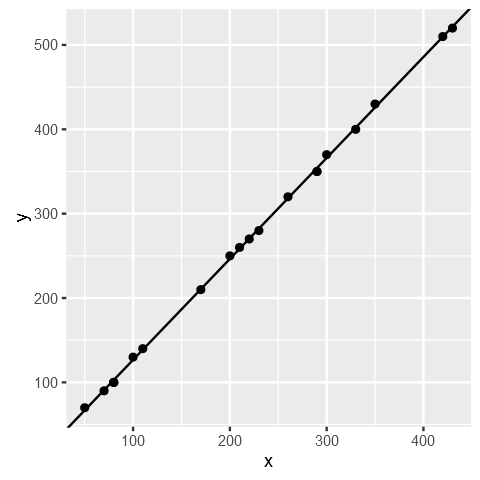

In [17]:
d %>>% ggplot(aes(x = x, y = y)) + geom_point() + 
    geom_abline(intercept = res.lm$coefficients["(Intercept)"], slope = res.lm$coefficients["x"])

（2）（1）からわかること，わからないこと

（3）（2）より，実態と認識のずれを調べる方法は

In [18]:
devtools::session_info()

Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------
Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------


 setting  value                       
 version  R version 3.3.0 (2016-05-03)
 system   x86_64, mingw32             
 ui       RTerm                       
 language (EN)                        
 collate  Japanese_Japan.932          
 tz       Asia/Tokyo                  
 date     2016-07-07                  

 package    * version    date       source                             
 assertthat   0.1        2013-12-06 CRAN (R 3.3.0)                     
 base64enc    0.1-3      2015-07-28 CRAN (R 3.3.0)                     
 Cairo      * 1.5-9      2015-09-26 CRAN (R 3.3.0)                     
 colorspace   1.2-6      2015-03-11 CRAN (R 3.3.0)                     
 DBI          0.4-1      2016-05-08 CRAN (R 3.3.0)                     
 devtools     1.11.1     2016-04-21 CRAN (R 3.3.0)                     
 digest       0.6.9      2016-01-08 CRAN (R 3.3.0)                     
 dplyr      * 0.5.0      2016-06-24 CRAN (R 3.3.1)                     
 evaluate     0.9        2016-04-29 CRA